In [16]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [17]:
FILE_URL_PATH= 'https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/people_responses.csv'

In [130]:
young = pd.read_csv(filepath_or_buffer= FILE_URL_PATH)
df_copy= young.copy()

# Intro to Probability & Statistics

#### TODO:
1. Descriptive Statistics:
    * Calculate statistics such as Mode, Mean, Median and Standard Deviation of weight and age. Do they respond to any known distribution?
    * Carry out an analysis of outliers and missing values.
    * Explain how the metrics vary when we breakdown the dataset by gender. Do they respond to any known distribution? Qualitatively and graphically compare both distributions.
2. Calculate the marginal and joint probability, and the correlation between two other variables, for example alcohol consumption and smoking.
    * Visually represent the joint probability between the possible values of the chosen variables.
3. Answer the following questions: What would happen to smoking levels if smoking is banned in bars? What would happen to the number of alcohol consumers if the number of smokers who drink alcohol decreases?

In [19]:
df_copy.head(5)

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow


In [20]:
descriptive_lines= f"The dataset has {young.shape[0]} rows and {young.shape[1]} columns"
print(descriptive_lines)

The dataset has 1010 rows and 150 columns


*****
## 1. Descriptive statistics

In [21]:
fields_to_analyze= ['Age', 'Weight']

In [22]:
lines= []

for field in fields_to_analyze:
    lines.append(dict(
        Field= field, 
        Mean= round(df_copy[field].mean(), 2), 
        Median= df_copy[field].median(), 
        Mode= df_copy[field].mode().values[-1]
    ))

df_descriptive_analysis= pd.DataFrame(lines).set_index('Field')
df_descriptive_analysis


,Mean,Median,Mode
Field,,,
Age,20.43,20.0,19.0
Weight,66.41,64.0,60.0


**Mean and Mode are preatty close for both fields, which gives the idea that values for are evenly distributed around the mean for Age and Weight (like a Normal Distribution). But I consider it isn't enough information to define the data distribution for them.**

### Frequency Distribution by Age and Weight

In [23]:
df_frequency_dist= df_copy[fields_to_analyze] \
    .describe() \
    .applymap(lambda x: round(x, 2)) \
    .T \
    .drop(columns= ['count', 'min', 'max'])

In [24]:
df_frequency_dist

,mean,std,25%,50%,75%
Age,20.43,2.83,19.0,20.0,22.0
Weight,66.41,13.84,55.0,64.0,75.0


**Taking a look to the quartiles, 25% and 75% are closer to be equidistant from the median, another hint that for both fields, distribution seems to respond to a Normal Distribution. Lets plotted the empirical distribution**

### Histogram

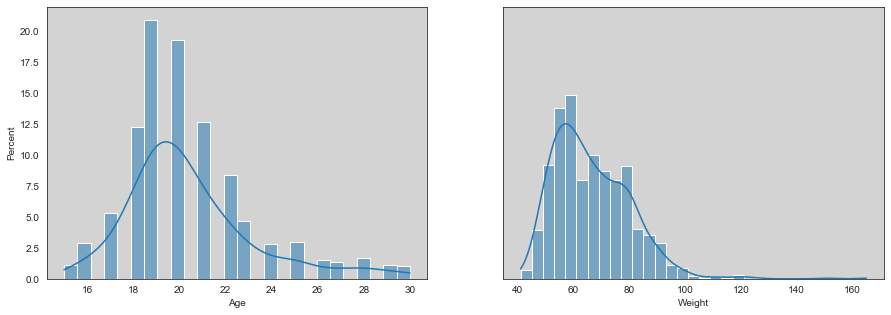

In [133]:
figure, axs= plt.subplots(
    nrows= 1, 
    ncols= len(fields_to_analyze), 
    figsize= (15, 5),
    sharey= True
)

sns.set_style(rc= {"grid.color": "1", 'axes.facecolor': 'lightgrey'})

for index, field in enumerate(fields_to_analyze):
    sns.histplot(data= df_copy, x= field, ax= axs[index], fill= True,stat="percent", kde= True, element= 'bars')

### Missing values

In [27]:
n_missing_values= pd.DataFrame(
        data= df_copy[fields_to_analyze]
            .isna()                     
            .sum(),                     
        columns= ['Number of missing values']   
    )\
    .T                      

In [28]:
n_missing_values

,Age,Weight
Number of missing values,7,20


### Outliers

### Gender breakdown

### Correlation between variables

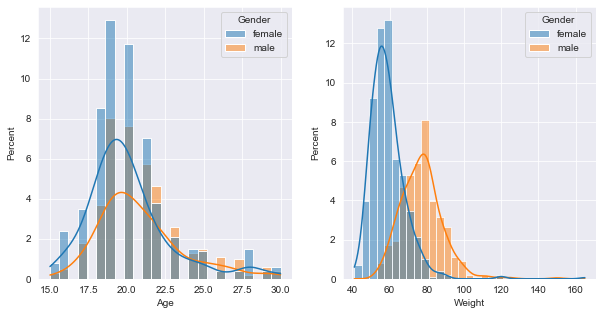

In [86]:
sns.set_style("darkgrid")

figure, axs= plt.subplots(
    nrows= 1, 
    ncols= len(fields_to_analyze), 
    figsize= (10, 5)
)


for index, field in enumerate(fields_to_analyze):
    sns.histplot(data= df_copy, x= field, ax= axs[index], fill= True, stat= "percent", kde= True, element= 'bars', hue= "Gender", multiple= "layer")

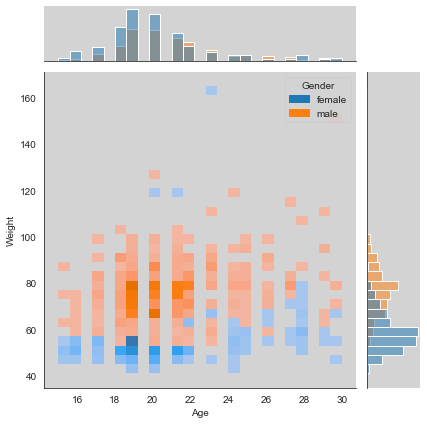

In [151]:
g= sns.jointplot(data= df_copy, x= 'Age', y= 'Weight', hue= 'Gender', kind= 'hist')

****
## 2. Joint probability

#### To do this we will define the concepts of marginal probability and joint probability

Marginal Probability: Probability of one variable without considering another, for example:

$$P_X=P[X=x]=\sum_{\forall y_i}p_{xy}(x,y_i)$$

#### Joint Probability: In a bivariate or multimavariate sample space, each possible outcome refers to two or more characteristics. Then the probability of a joint outcome is denoted $P(X \cap Y)$ and is defined as:

$$P_{XY}=P[(X=x)\cap(Y=y)]$$

__TODO:__
Do some research on [crosstab](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html) pandas function.

****
## 3. Answers
### Smoking levels and smoking bans in bars

****
# Extras:

## Other data visualizations

#### We choose some characteristics (numerical) and analyze them breaking down by gender using a box plot